# Housing Prices Competition__Kaggle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#train set
df1 =pd.read_csv('train_house.csv')
#test set
df2= pd.read_csv('test_house.csv')

In [3]:
df2.shape

(1459, 80)

In [4]:
df1['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

<AxesSubplot:>

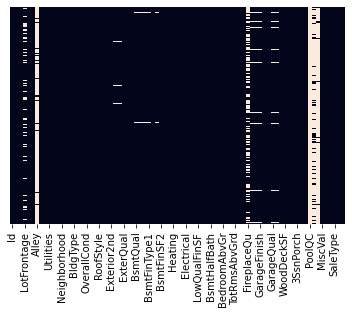

In [5]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df1.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [8]:
df1.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
df1.shape

(1460, 81)

In [10]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


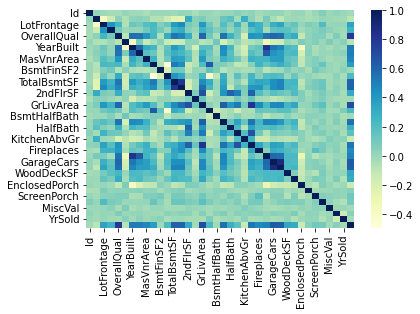

In [11]:
sns.heatmap(df1.corr(), cmap='YlGnBu')
plt.show()

In [12]:
df1['LotFrontage']=df1['LotFrontage'].fillna(df1['LotFrontage'].mean())

In [13]:
df1['LotFrontage'].isnull().sum()

0

In [14]:
df1.drop(['Alley'],axis=1,inplace=True)

In [15]:
df1['BsmtCond']=df1['BsmtCond'].fillna(df1['BsmtCond'].mode()[0])
df1['BsmtQual']=df1['BsmtQual'].fillna(df1['BsmtQual'].mode()[0])

In [16]:
#Fill missing values for "train set"
df1['FireplaceQu']=df1['FireplaceQu'].fillna(df1['FireplaceQu'].mode()[0])
df1['GarageType']=df1['GarageType'].fillna(df1['GarageType'].mode()[0])
df1.drop(['GarageYrBlt'],axis=1,inplace=True)
df1['GarageFinish']=df1['GarageFinish'].fillna(df1['GarageFinish'].mode()[0])
df1['GarageQual']=df1['GarageQual'].fillna(df1['GarageQual'].mode()[0])
df1['GarageCond']=df1['GarageCond'].fillna(df1['GarageCond'].mode()[0])
df1.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df1.drop(['Id'],axis=1,inplace=True)
df1['MasVnrType']=df1['MasVnrType'].fillna(df1['MasVnrType'].mode()[0])
df1['MasVnrArea']=df1['MasVnrArea'].fillna(df1['MasVnrArea'].mode()[0])
df1['BsmtExposure']=df1['BsmtExposure'].fillna(df1['BsmtExposure'].mode()[0])
df1['BsmtFinType2']=df1['BsmtFinType2'].fillna(df1['BsmtFinType2'].mode()[0])
df1['BsmtFinType1']=df1['BsmtFinType1'].fillna(df1['BsmtFinType1'].mode()[0])
df1['Electrical']=df1['Electrical'].fillna(df1['Electrical'].mode()[0])


In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [19]:
df2.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [20]:
#Fill missing values for "test set"
df2['LotFrontage']=df2['LotFrontage'].fillna(df2['LotFrontage'].mean())
df2.drop(['Alley'],axis=1,inplace=True)
df2['BsmtCond']=df2['BsmtCond'].fillna(df2['BsmtCond'].mode()[0])
df2['BsmtQual']=df2['BsmtQual'].fillna(df2['BsmtQual'].mode()[0])
df2['FireplaceQu']=df2['FireplaceQu'].fillna(df2['FireplaceQu'].mode()[0])
df2['GarageType']=df2['GarageType'].fillna(df2['GarageType'].mode()[0])
df2.drop(['GarageYrBlt'],axis=1,inplace=True)
df2['GarageFinish']=df2['GarageFinish'].fillna(df2['GarageFinish'].mode()[0])
df2['GarageQual']=df2['GarageQual'].fillna(df2['GarageQual'].mode()[0])
df2['GarageCond']=df2['GarageCond'].fillna(df2['GarageCond'].mode()[0])
df2.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df2.drop(['Id'],axis=1,inplace=True)
df2['MasVnrType']=df2['MasVnrType'].fillna(df2['MasVnrType'].mode()[0])
df2['MasVnrArea']=df2['MasVnrArea'].fillna(df2['MasVnrArea'].mode()[0])
df2['BsmtExposure']=df2['BsmtExposure'].fillna(df2['BsmtExposure'].mode()[0])
df2['BsmtFinType2']=df2['BsmtFinType2'].fillna(df2['BsmtFinType2'].mode()[0])
df2['SaleType']=df2['SaleType'].fillna(df2['SaleType'].mode()[0])
df2['Utilities']=df2['Utilities'].fillna(df2['Utilities'].mode()[0])
df2['MSZoning']=df2['MSZoning'].fillna(df2['MSZoning'].mode([0]))
df2['Exterior1st']=df2['Exterior1st'].fillna(df2['Exterior1st'].mode()[0])
df2['Exterior2nd']=df2['Exterior2nd'].fillna(df2['Exterior2nd'].mode()[0])
df2['BsmtFinType1']=df2['BsmtFinType1'].fillna(df2['BsmtFinType1'].mode()[0])
df2['BsmtFinSF1']=df2['BsmtFinSF1'].fillna(df2['BsmtFinSF1'].mean())
df2['BsmtFinSF2']=df2['BsmtFinSF2'].fillna(df2['BsmtFinSF2'].mean())
df2['BsmtUnfSF']=df2['BsmtUnfSF'].fillna(df2['BsmtUnfSF'].mean())
df2['TotalBsmtSF']=df2['TotalBsmtSF'].fillna(df2['TotalBsmtSF'].mean())
df2['BsmtFullBath']=df2['BsmtFullBath'].fillna(df2['BsmtFullBath'].mean())
df2['BsmtHalfBath']=df2['BsmtHalfBath'].fillna(df2['BsmtHalfBath'].mean())
df2['KitchenQual']=df2['KitchenQual'].fillna(df2['KitchenQual'].mode()[0])
df2['Functional']=df2['Functional'].fillna(df2['Functional'].mode()[0])
df2['GarageCars']=df2['GarageCars'].fillna(df2['GarageCars'].mean())
df2['GarageArea']=df2['GarageArea'].fillna(df2['GarageArea'].mean())
df2['MSZoning']=df2['MSZoning'].fillna(df2['MSZoning'].mode()[0])

In [21]:
df2.isnull().sum().sum()

0

In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

<AxesSubplot:>

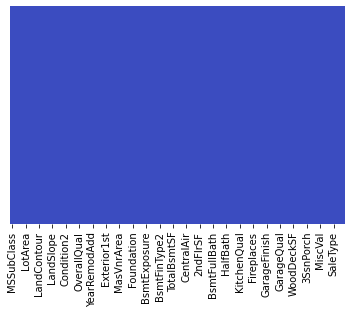

In [23]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [24]:
df2.shape

(1459, 74)

In [25]:
df1.isnull().sum().sum()

0

In [26]:
df2.isnull().sum().sum()

0

In [27]:
#handle the categorical variables
from sklearn.preprocessing import OneHotEncoder

In [28]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond','ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure',
         'BsmtFinType1','BsmtFinType2','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType',
         'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu',
         'GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [29]:
len(columns)

39

In [30]:
def categoric(col):
    df1_final=final_df1
    j=0
    for i in col:
        
        print(i)
        df_t=pd.get_dummies(final_df1[i],drop_first=True)
        
        final_df1.drop([i],axis=1,inplace=True)
        if j==0:
            df1_final=df_t.copy()
        else:
            
            df1_final=pd.concat([df1_final,df_t],axis=1)
        j=j+1
       
        
    df1_final=pd.concat([final_df1,df1_final],axis=1)
        
    return df1_final

In [31]:
main_df1 = df1.copy

In [32]:
df1.shape

(1460, 75)

In [33]:
final_df1 = pd.concat([df1,df2],axis=0)

In [34]:
final_df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,700,7,2006,WD,Normal,NaN


In [35]:
final_df1.isnull().sum().sum()

1459

In [36]:
final_df1['SalePrice'].isnull().sum().sum()

1459

In [37]:
final_df1.shape

(2919, 75)

In [38]:
df1.isnull().sum().sum()

0

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotFrontage    1459 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [40]:
final_df1=categoric(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [41]:
final_df1.shape

(2919, 236)

In [42]:
final_df1.shape

(2919, 236)

In [43]:
final_df1.isnull().sum().sum()

1459

In [44]:
df_Train=final_df1.iloc[:1459,:]
df_Test=final_df1.iloc[1460:,:]

In [45]:
df_Train.shape

(1459, 236)

In [46]:
df_Test.shape

(1459, 236)

In [47]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,1,0,1
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,1,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,1,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,0,0,0,1,0,1
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,1,0,1


In [48]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fa,Gd,Po,TA,Fa,Gd,Po,TA,P,Y
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,1,0,1
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,1,0,1
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,1,0,1
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,1,0,1
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,1,0,1


In [49]:
df_Train.shape

(1459, 236)

In [50]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_18608\3985304647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [51]:
df_Test.shape

(1459, 235)

In [52]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

# Prediction 

### Random Forest 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_test = df_Test

In [55]:
#train the random forest model
rf = RandomForestClassifier(n_estimators=100)  
rf.fit(X_train, y_train)

#testing the model
y_pred = rf.predict(X_test)

In [56]:
X_train.shape

(1459, 235)

In [57]:
X_test.shape

(1459, 235)

In [69]:
y_pred = rf.predict(X_test)
y_pred

array([115000., 145250., 192000., ..., 168000.,  93500., 250000.])

In [70]:
df1.shape

(1460, 75)

In [71]:
y_pred.shape

(1459,)

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
score = rf.score(X_test, y_pred)

In [74]:
score

1.0

In [75]:
from math import sqrt

In [76]:
np.sqrt(mean_squared_error(y_train,y_pred))

110216.17579145638